# Project. Market of public catering establishments in Moscow

**Task: prepare a study of the Moscow market, find interesting features and present the results obtained, which in the future will help in choosing a suitable place for investors to open a catering business.**

**Plan:**
1. [Loading data, studying general information.](#info)
2. [Data preprocessing.](#предобработка)
3. [Data analysis.](#analys)
4. [Detailed reserching: opening a coffee house.](#detail)
5. [Presentation .](#present)
6. [General conclusion.](#end)

## 1. Loading data, studying general information.<a id="info"></a>

In [84]:
! pip install folium

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st
import math as mt
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
from matplotlib.pyplot import figure
import plotly.express as px
from plotly import graph_objects as go
import folium
import json
from folium import Map, Choropleth

In [86]:
data = pd.read_csv('C:/Users/sony/Downloads/moscow_places.csv')

In [87]:
data.head(5)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**The table contains the following data:**
1. name — businesses name;
2. address — businesses address;
3. category — businesses category;
4. hours — information about days and hours of operation;
5. lat — latitude of the geographic point where the businesses is located;
6. lng — Longitude of the geographic point where the businesses is located;
7. rating —  businesses rating according to user ratings in Yandex Maps (the highest rating is 5.0);
8. price — the range of prices in the businesses, for example, “average”, “below average”, “above average”, and so on;
9. avg_bill — a row that stores the average order value as a range;
10. middle_avg_bill — number with an estimate of the average bill.
11. middle_coffee_cup — number with an estimate of one cup of cappuccino
12. chain — a number, expressed as 0 or 1, that indicates whether the establishment is a chain store;
13. district — the administrative region in which the institution is located;
14. seats — number of seats.

There are 14 columns in the dataset, in some columns we see Nans. Float and Object data types. I think it's better change the data type in the chain column to boolean values.

## 2. Data preprocessing.<a id="предобработка"></a>

In [89]:
#lets check which columns have the most Nans
data.isna().sum().sort_values(ascending= False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
name                    0
category                0
address                 0
district                0
lat                     0
lng                     0
rating                  0
chain                   0
dtype: int64

In [90]:
data.isna().mean().sort_values(ascending=False)

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
price                0.605639
avg_bill             0.546039
seats                0.429574
hours                0.063764
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
lat                  0.000000
lng                  0.000000
rating               0.000000
chain                0.000000
dtype: float64

In [91]:
data.describe()

,lat,lng,rating,middle_avg_bill,middle_coffee_cup,chain,seats
count,8406.000000,8406.000000,8406.000000,3149.000000,535.000000,8406.000000,4795.000000
mean,55.750109,37.608570,4.229895,958.053668,174.721495,0.381275,108.421689
std,0.069658,0.098597,0.470348,1009.732845,88.951103,0.485729,122.833396
min,55.573942,37.355651,1.000000,0.000000,60.000000,0.000000,0.000000
25%,55.705155,37.538583,4.100000,375.000000,124.500000,0.000000,40.000000
50%,55.753425,37.605246,4.300000,750.000000,169.000000,0.000000,75.000000
75%,55.795041,37.664792,4.400000,1250.000000,225.000000,1.000000,140.000000
max,55.928943,37.874466,5.000000,35000.000000,1568.000000,1.000000,1288.000000


Let's check the histograms to have an representation about the distribution of data

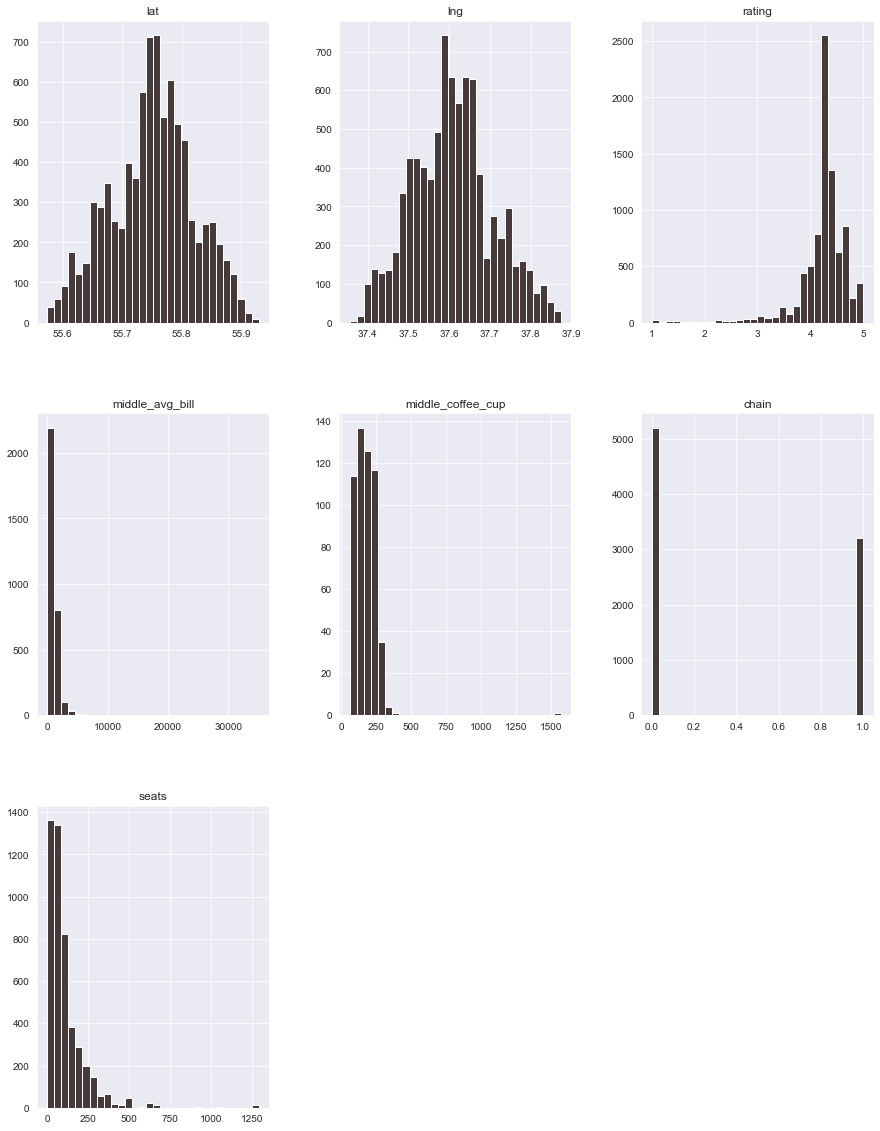

In [92]:
sns.set_style('dark')
data.hist(bins=30,figsize=(15, 20), color = '#473a3a');

**Conclusion:** The dataset contains 8406 rows. There are many Nans in the data, especially in the cost of average cup of coffee (nearly 90% Nans). The number of seats, the cost of average cup of coffee, and the average bill clearly contain abnormal values, which can be seen from the histograms, as well as from the Describe table (maximum values: 1288, 1568 and 35000, respectively).

In [93]:
#convert the column with the name of the businesses to lowerstring
data['name'] = data['name'].str.lower() 

In [94]:
data[data.name.duplicated()].sample(5)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
4527,хачапури и вино,ресторан,"Москва, улица Солянка, 1/2с1",Центральный административный округ,"пн-ср 12:00–23:00; чт 12:00–00:00; пт,сб 12:00...",55.753841,37.638124,4.7,NaN,NaN,NaN,NaN,1,NaN
457,drive café,кафе,"Москва, Фестивальная улица, 6А, стр. 1",Северный административный округ,"ежедневно, круглосуточно",55.858064,37.487468,4.2,NaN,NaN,NaN,NaN,1,100.0
6712,vse-em,кафе,"Москва, Профсоюзная улица, 126, корп. 2",Юго-Западный административный округ,"ежедневно, 11:00–23:00",55.631778,37.517619,4.2,NaN,NaN,NaN,NaN,1,170.0
5006,osteria mario,пиццерия,"Москва, Пятницкая улица, 25с1Д",Центральный административный округ,"пн-чт 10:00–00:00; пт,сб 10:00–02:00; вс 10:00...",55.741597,37.628681,4.6,NaN,NaN,NaN,NaN,1,NaN
687,тануки,ресторан,"Москва, Дмитровское шоссе, 64, корп. 3",Северный административный округ,"пн-чт 12:00–23:00; пт,сб 12:00–01:00; вс 12:00...",55.856447,37.562263,4.4,NaN,Средний счёт:1000–1500 ₽,1250.0,NaN,1,198.0


In [95]:
#Lets check the full duplicates
data.duplicated().sum()

0

In [96]:
#Lets check unique values
data['name'].nunique()

5512

we can see that there are duplicates in the **name** column, but given that there are network businesses in the dataset and we did not find complete duplicates, I think that they should not be processed. 

In [97]:
#look at the dataset, where is no information about time of work
data[data['hours'].isna() == True].head(10)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
38,ижора,булочная,"Москва, Ижорский проезд, 5А",Северный административный округ,NaN,55.888366,37.514856,4.4,NaN,NaN,NaN,NaN,0,NaN
40,кафе,кафе,"Москва, Ижорская улица, 18, стр. 1",Северный административный округ,NaN,55.895115,37.524902,3.7,NaN,NaN,NaN,NaN,0,NaN
44,кафетерий,кафе,"Москва, Ангарская улица, 24А",Северный административный округ,NaN,55.876289,37.519315,3.8,NaN,NaN,NaN,NaN,1,8.0
56,рыба из тандыра,быстрое питание,"Москва, Коровинское шоссе, 46, стр. 5",Северный административный округ,NaN,55.888010,37.515960,1.5,NaN,NaN,NaN,NaN,0,NaN
108,кафе,"бар,паб","Москва, МКАД, 82-й километр, вл18",Северо-Восточный административный округ,NaN,55.908930,37.558777,4.2,NaN,NaN,NaN,NaN,0,NaN
123,кафе,кафе,"Москва, Шенкурский проезд, 14",Северо-Восточный административный округ,NaN,55.897794,37.591395,4.3,NaN,NaN,NaN,NaN,0,50.0
126,кулинария,кафе,"Москва, Череповецкая улица, 17",Северо-Восточный административный округ,NaN,55.898741,37.585301,3.9,NaN,NaN,NaN,NaN,1,NaN
138,хинкальная,быстрое питание,"Москва, Шенкурский проезд, 14",Северо-Восточный административный округ,NaN,55.897751,37.591363,4.1,NaN,NaN,NaN,NaN,1,50.0
217,16 июня,кафе,"Москва, бульвар Академика Ландау, 3",Северо-Восточный административный округ,NaN,55.920370,37.552150,1.4,NaN,NaN,NaN,NaN,0,NaN
274,чайхана,кафе,"Москва, Широкая улица, 12",Северо-Восточный административный округ,NaN,55.886840,37.659610,3.0,NaN,NaN,NaN,NaN,1,50.0


Since there are only 6.3% Nans in the column of hours, we can delete all this rows, especially since this indicator will be useful to us in resurching

In [98]:
data = data.dropna(subset =['hours']).copy()

In [99]:
data.isna().mean().sort_values(ascending=False)

middle_coffee_cup    0.932147
middle_avg_bill      0.600635
price                0.579416
avg_bill             0.516137
seats                0.428844
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.000000
lat                  0.000000
lng                  0.000000
rating               0.000000
chain                0.000000
dtype: float64

The amount of Nans in other columns also decreased, which means the solution was correct
We will also fill in the Nans of all columns with numerical data with a gag 555

In [100]:
#replace Nans in the seats column
data['seats'] = data['seats'].fillna(555)

In [101]:
#replace Nans in the  middle_avg_bill
data['middle_avg_bill'] = data['middle_avg_bill'].fillna(555)

In [102]:
#replace Nans in the middle_coffee_cup
data['middle_coffee_cup'] = data['middle_coffee_cup'].fillna(-555)

In [103]:
#check results
data.isna().mean().sort_values(ascending=False)

price                0.579416
avg_bill             0.516137
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.000000
lat                  0.000000
lng                  0.000000
rating               0.000000
middle_avg_bill      0.000000
middle_coffee_cup    0.000000
chain                0.000000
seats                0.000000
dtype: float64

The rest of the Nans will not be touched for now.

In [104]:
#replace data type in seats
data['seats'] = data['seats'].astype('int')

In [105]:
#let's convert the values in the chain column to boolean values
data['chain'] = data['chain'].astype('bool')

Lets check the percentiles of the anomalous columns seats, middle_coffee_cup и avg_bill

In [106]:
print('90 percentile of seats number: {}'.format(round(np.percentile(data[data['seats']!=555]['seats'], 90)),2))
print ('95 percentile of seats number: {}'.format(round(np.percentile(data[data['seats']!=555]['seats'], 95)),2))
print('99 percentile of seats number: {}'.format(round(np.percentile(data[data['seats']!=555]['seats'], 99)),2))

90 percentile of seats number: 240
95 percentile of seats number: 306
99 percentile of seats number: 625


In [107]:
print('90 percentile of average bill: {}'.format(round(np.percentile(data[data['middle_avg_bill']!=555]['middle_avg_bill'], 90)),2))
print('95 percentile of average bill: {}'.format(round(np.percentile(data[data['middle_avg_bill']!=555]['middle_avg_bill'], 95)),2))
print('99 percentile of average bill: {}'.format(round(np.percentile(data[data['middle_avg_bill']!=555]['middle_avg_bill'], 99)),2))


90 percentile of average bill: 2000
95 percentile of average bill: 2250
99 percentile of average bill: 3750


In [108]:
print('90 percentile of average cofee price: {}'.format(round(np.percentile(data[data['middle_coffee_cup']!=-555]['middle_coffee_cup'], 90)),2))
print('95 percentile of average cofee price: {}'.format(round(np.percentile(data[data['middle_coffee_cup']!=-555]['middle_coffee_cup'], 95)),2))
print('99 percentile of average cofee price: {}'.format(round(np.percentile(data[data['middle_coffee_cup']!=-555]['middle_coffee_cup'], 99)),2))


90 percentile of average cofee price: 256
95 percentile of average cofee price: 275
99 percentile of average cofee price: 310


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7870 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               7870 non-null   object 
 1   category           7870 non-null   object 
 2   address            7870 non-null   object 
 3   district           7870 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                7870 non-null   float64
 6   lng                7870 non-null   float64
 7   rating             7870 non-null   float64
 8   price              3310 non-null   object 
 9   avg_bill           3808 non-null   object 
 10  middle_avg_bill    7870 non-null   float64
 11  middle_coffee_cup  7870 non-null   float64
 12  chain              7870 non-null   bool   
 13  seats              7870 non-null   int32  
dtypes: bool(1), float64(5), int32(1), object(7)
memory usage: 837.7+ KB


remove all anomalous values ​​for these columns, select values ​​greater than the 99th percentile

In [110]:
data = data.query('seats < 625').copy()

In [111]:
data = data.query('middle_avg_bill < 3750').copy()

In [112]:
data = data.query('middle_coffee_cup <310').copy()

We got clean dataset

**Lets add a column with street names**

In [113]:
data['street'] = data['address'].str.split(', ').apply(lambda x: x[1])

**Let's add a column with businesses that work 24/7**

In [114]:
data['is_24/7'] = data['hours'].str.contains('ежедневно, круглосуточно')

In [115]:
#check result
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,555.0,-555.0,False,555,улица Дыбенко,False
1,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,-555.0,False,4,улица Дыбенко,False
2,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,-555.0,False,45,Клязьминская улица,False
3,dormouse coffee shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,555.0,170.0,False,555,улица Маршала Федоренко,False
4,иль марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,-555.0,True,148,Правобережная улица,False


**Conclusion**
We checked for duplicates, changed data types, eliminated outliers and tried to make sure that their removal does not affect further research, and also changed data types in several columns.

## 3. Data analysis<a id="analys"></a>

Lets check the amount of businesses by category

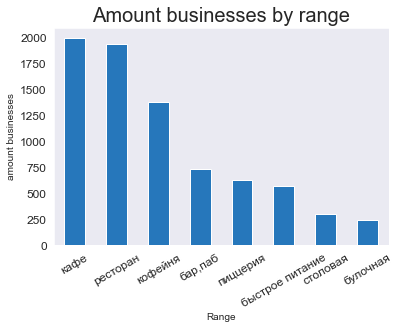

In [116]:
data.groupby('category')['name'].count()\
.sort_values(ascending=False)\
.plot(kind = 'bar', x='category', y='count', figsize=(6,4),rot=30, legend = False, color = '#2677bb', ylabel='amount businesses', xlabel='Range', fontsize = 12)\
.set_title('Amount businesses by range', fontsize = 20)\
; 

**Conclusion:** the first three are cafes, restaurants and a coffee houses. Coffee houses, as a rule, do not have their own kitchen, unlike cafes and restaurants. close canteens, bakeries and fast food. Canteens and fast foods have their own kitchen and, by optimizing food preparation, reduce costs for the kitchen; bakeries, as a rule, also have their own production, but a narrow assortment. Apparently, cafes and restaurants are in great demand due to the fact that they have their own kitchen, as a rule, a good interior, cafes in this sense are convenient for meetings, a light snack, and their work does not require large resources due to the lack of their own kitchen, I think that the leaders are in their positions also because these are convenient places to meet and spend time and not just to satisfy hunger. As for Bars and Pizzerias, these are still more narrowly focused businesses, and since the assortment with Pizzas and drinks is found in cafes and restaurants, they become more universal and occupy a large part of the market.

In [117]:
#Lets check amount businesses by range
data.category.value_counts().to_frame()

,category
кафе,1993
ресторан,1933
кофейня,1380
"бар,паб",732
пиццерия,624
быстрое питание,568
столовая,304
булочная,248


In [118]:
#Lets check average bills
category_avg_bill =data[data['middle_avg_bill']!=555]\
.pivot_table(index='category', values='middle_avg_bill', aggfunc=['count','mean','median'])\
.reset_index()

category_avg_bill.columns = ['category','count','mean_bill','median_bill']
category_avg_bill.sort_values(by='mean_bill', ascending=False).style.background_gradient('coolwarm')

,category,count,mean_bill,median_bill
0,"бар,паб",338,1261.177515,1250.000000
6,ресторан,1009,1240.680872,1200.000000
5,пиццерия,392,785.852041,600.000000
3,кафе,685,695.629197,550.000000
1,булочная,53,658.773585,450.000000
4,кофейня,199,615.286432,400.000000
2,быстрое питание,235,421.472340,375.000000
7,столовая,180,316.377778,300.000000


The highest average bill in the bar, pub (1261) and restaurant (1240) ranges. Low bill for fast food (421) and canteens (316). We also see that there is very little data on average checks for bakeries. We also see a big difference in the average and median values ​​for the average bills of pizzerias, cafes, bakeries, and coffee houses. Most likely, there are businesses in the dataset, where the average bills are much higher. 

In [119]:
#Let's check the count of seats by range
category_seats =data[data['seats']!=555]\
.groupby('category').agg({'seats': ['count', 'mean', 'median','min','max']}) \
.reset_index()

category_seats.columns = ['category', 'count', 'mean', 'median','min','max']
category_seats = category_seats.sort_values(by='median', ascending=False)
category_seats.sort_values(by='median', ascending=False).style.background_gradient('coolwarm') 

,category,count,mean,median,min,max
6,ресторан,1188,114.808081,84.500000,0,500
0,"бар,паб",444,109.810811,80.000000,0,585
4,кофейня,728,101.017857,80.000000,0,500
7,столовая,156,89.320513,72.000000,0,428
2,быстрое питание,323,97.544892,69.000000,0,500
3,кафе,1018,89.191552,60.000000,0,600
5,пиццерия,419,87.976134,52.000000,0,455
1,булочная,145,86.365517,50.000000,0,478


By the fact that in each range the minimum value is 0, there are businesses in the dataset that work only for delivery. as well as large businesses with 500 or more seats, while the count of seats 478 for a bakery looks suspiciously large, perhaps these are some errors in the dataset. if you look at the average and median values, then we see a roughly understandable picture based on the median of seats from 50 to 85, and the average ones are most likely beaten out due to the fact that there are businesses with a significant advantage in the big direction.

''

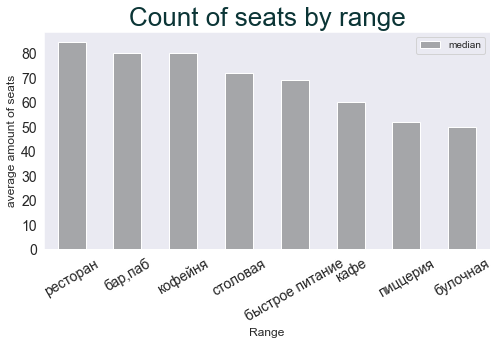

In [120]:
#Lets create a plot of amount seats by range
fig = category_seats.plot(kind = 'bar', x='category', y='median', figsize=(8,4), rot=30, legend = True, fontsize = 14, color = '#a5a6a9')
fig.set_ylabel('average amount of seats',fontsize = 12)
fig.set_xlabel('Range',fontsize = 12)
fig.set_title('Count of seats by range', fontsize = 26, color = '#0b3536')
; 


Bakeries and pizzerias have significantly fewer seats, perhaps this is due to the fact that businesses of this kind are more actively working for delivery.

In [121]:
#let's check how chain businesses are distributed
chain_category = data.groupby('category')[['category','chain']].value_counts().reset_index()
chain_category.columns = ['category','chain','count']
chain_category.style.background_gradient('coolwarm')

,category,chain,count
0,"бар,паб",False,574
1,"бар,паб",True,158
2,булочная,True,153
3,булочная,False,95
4,быстрое питание,False,346
5,быстрое питание,True,222
6,кафе,False,1286
7,кафе,True,707
8,кофейня,True,704
9,кофейня,False,676


In [122]:
#Let's build a visualization of proportion
fig =(
   px.bar(chain_category, x = 'category', y='count', color='chain', 
          title='Plot chain and non-chain businesses',
         width=1000, height=400,
         color_discrete_map={ 
                "True": "#558a86", "False": "#f54123"
            })
    
)   

fig.update_xaxes(title_text='Range') 
fig.update_yaxes(title_text='Amount businesses')
fig.show() 


The count of chain establishments relative to non-chain businesses is higher in pizzerias and bakeries, in coffee houses the ratio is approximately the same. In other ranges, there are more non-chain businesses.

In [123]:
#Let's chack the 15 most popular businesses
popular = data.groupby(['name','category'])['name'].agg(['count','first']).reset_index().sort_values(by = 'count',ascending=False).head(15)
popular

,name,category,count,first
5494,шоколадница,кофейня,115,шоколадница
2859,кафе,кафе,79,кафе
2561,домино'с пицца,пиццерия,77,домино'с пицца
2531,додо пицца,пиццерия,74,додо пицца
1149,one price coffee,кофейня,71,one price coffee
5565,яндекс лавка,ресторан,67,яндекс лавка
407,cofix,кофейня,65,cofix
1288,prime,ресторан,49,prime
3202,кофепорт,кофейня,42,кофепорт
3257,кулинарная лавка братьев караваевых,кафе,38,кулинарная лавка братьев караваевых


on the second row we see an unidentified 'animal', we will delete it, because it is not clear what kind of business or chain it is

In [124]:
popular_clean = data[data['name']!='кафе'].groupby(['name','category'])['name'].agg(['count','first']).reset_index().sort_values(by = 'count',ascending=False).head(15)
popular_clean

,name,category,count,first
5489,шоколадница,кофейня,115,шоколадница
2561,домино'с пицца,пиццерия,77,домино'с пицца
2531,додо пицца,пиццерия,74,додо пицца
1149,one price coffee,кофейня,71,one price coffee
5560,яндекс лавка,ресторан,67,яндекс лавка
407,cofix,кофейня,65,cofix
1288,prime,ресторан,49,prime
3197,кофепорт,кофейня,42,кофепорт
3252,кулинарная лавка братьев караваевых,кафе,38,кулинарная лавка братьев караваевых
4741,теремок,ресторан,36,теремок


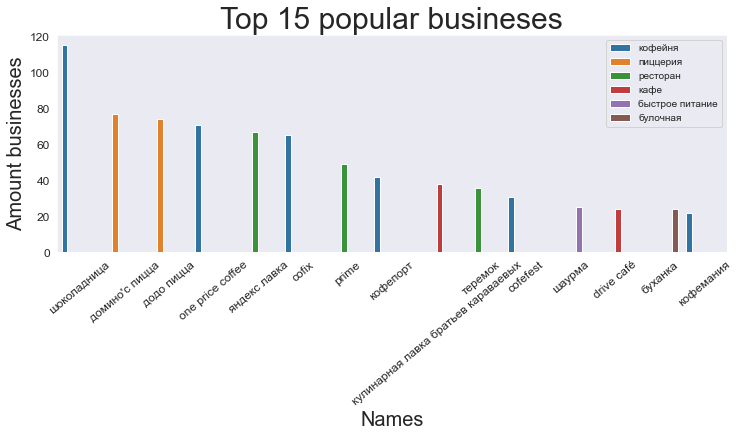

In [125]:
#lets build the plot
plt.figure(figsize=(12, 4))
fig = sns.barplot(data= popular_clean, x='name', y='count', hue = 'category')
fig.tick_params(axis='both', which='major', labelsize=12)
fig.set_xticklabels(fig.get_xticklabels(),rotation = 40)
fig.set_ylabel('Amount businesses',fontsize = 20)
fig.set_xlabel('Names',fontsize = 20)
fig.set_title('Top 15 popular busineses', fontsize = 30)
plt.legend( fontsize='10');

We see that the 'chocolate' chain is the clear leader, followed by pizzeria chains and coffee houses. in general, the top 15 is dominated by coffee houses, restaurants are in second place (although Yandex Lavka works as a takeaway and hardly fits the range of a restaurant). We can say that coffee houses, pizzerias and restaurants are among the leaders.

In [126]:
#Let's check how the count of businesses is distributed by districts
data.groupby('district')['name'].count().reset_index().sort_values(by='name',ascending=False)\
.style.background_gradient('coolwarm')

,district,name
5,Центральный административный округ,2186
3,Северо-Восточный административный округ,828
8,Южный административный округ,826
2,Северный административный округ,818
1,Западный административный округ,765
0,Восточный административный округ,715
7,Юго-Западный административный округ,648
6,Юго-Восточный административный округ,627
4,Северо-Западный административный округ,369


The largest amount of businesses is concentrated in the Central Administrative District -2186. The smallest amount is in SZAO 369 SEAD and SZAO 648 and 627 respectively.

Lets check the distribution of groups of businessess by district

In [127]:
district_group =data.pivot_table(index='district', columns='category', values='name', aggfunc='count').reset_index()
district_group.style.background_gradient('coolwarm')

category,district,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
0,Восточный административный округ,48,23,64,218,100,71,152,39
1,Западный административный округ,45,36,60,188,144,70,199,23
2,Северный административный округ,62,36,54,202,182,73,172,37
3,Северо-Восточный административный округ,57,28,79,228,157,66,173,40
4,Северо-Западный административный округ,23,12,27,86,62,40,102,17
5,Центральный административный округ,358,50,85,444,424,112,648,65
6,Юго-Восточный административный округ,37,12,61,217,87,55,135,23
7,Юго-Западный административный округ,37,26,57,195,94,64,158,17
8,Южный административный округ,65,25,81,215,130,73,194,43


In [128]:
#for ease of reading, we will replace the names of the districts with abbreviated ones
replace_values = {'Восточный административный округ':'ВАО','Западный административный округ':'ЗАО'\
,'Северный административный округ':'САО', 'Северо-Восточный административный округ':'СВАО'\
,'Северо-Западный административный округ':'СЗАО'\
,'Центральный административный округ':'ЦАО','Юго-Восточный административный округ':'ЮВАО'\
,'Юго-Западный административный округ':'ЮЗАО','Южный административный округ':'ЮАО'}
district_group = district_group.replace({'district': replace_values})
district_group['district']

0     ВАО
1     ЗАО
2     САО
3    СВАО
4    СЗАО
5     ЦАО
6    ЮВАО
7    ЮЗАО
8     ЮАО
Name: district, dtype: object

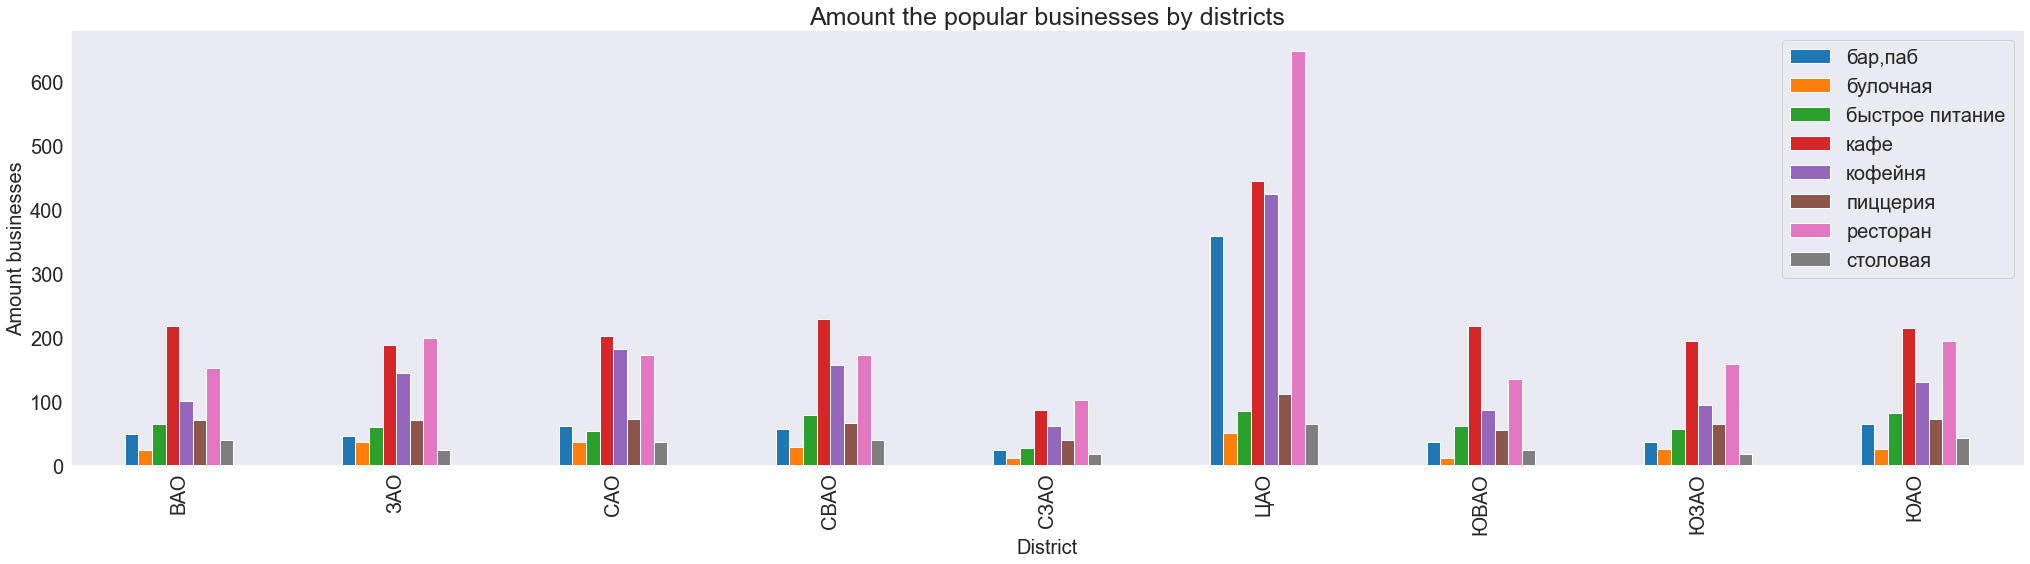

In [129]:
#Lets build the plot 
fig=district_group.plot(x='district',figsize=(35,8),kind='bar',fontsize = 20)
      
fig.set_title('Amount the popular businesses by districts', fontsize = 25)
fig.set_ylabel('Amount businesses',fontsize = 20)
fig.set_xlabel('District',fontsize = 20)
plt.legend(fontsize='20');

In all categories of businesses, the CAO is in the lead. In SZAO, there are much fewer businesses. In the range of coffee houses, the smallest count is the South-Eastern Administrative District 87 and the South-Western Administrative District 94. There are few canteens in the South-Western and North-West Administrative Districts.

In [130]:
category_rating = data.pivot_table(index='category', values='rating'\
, aggfunc=['count','mean','median','min','max']).reset_index()

category_rating.columns = ['category','count','mean','median','min','max']
category_rating.sort_values(by='mean',ascending=False).style.background_gradient('coolwarm')

,category,count,mean,median,min,max
0,"бар,паб",732,4.395219,4.400000,1.100000,5.000000
5,пиццерия,624,4.300801,4.300000,1.000000,5.000000
6,ресторан,1933,4.292550,4.300000,1.000000,5.000000
1,булочная,248,4.276210,4.300000,1.300000,5.000000
4,кофейня,1380,4.275362,4.300000,1.400000,5.000000
7,столовая,304,4.217763,4.300000,1.000000,5.000000
3,кафе,1993,4.152383,4.300000,1.000000,5.000000
2,быстрое питание,568,4.058627,4.200000,1.100000,5.000000


The median and average rating of businesses is approximately the same for all ranges. We see coffee houses and bakeries as the leaders according to the minimum rating. Either they surprise with their quality, or customers are more lenient towards the requirements for these businesses.

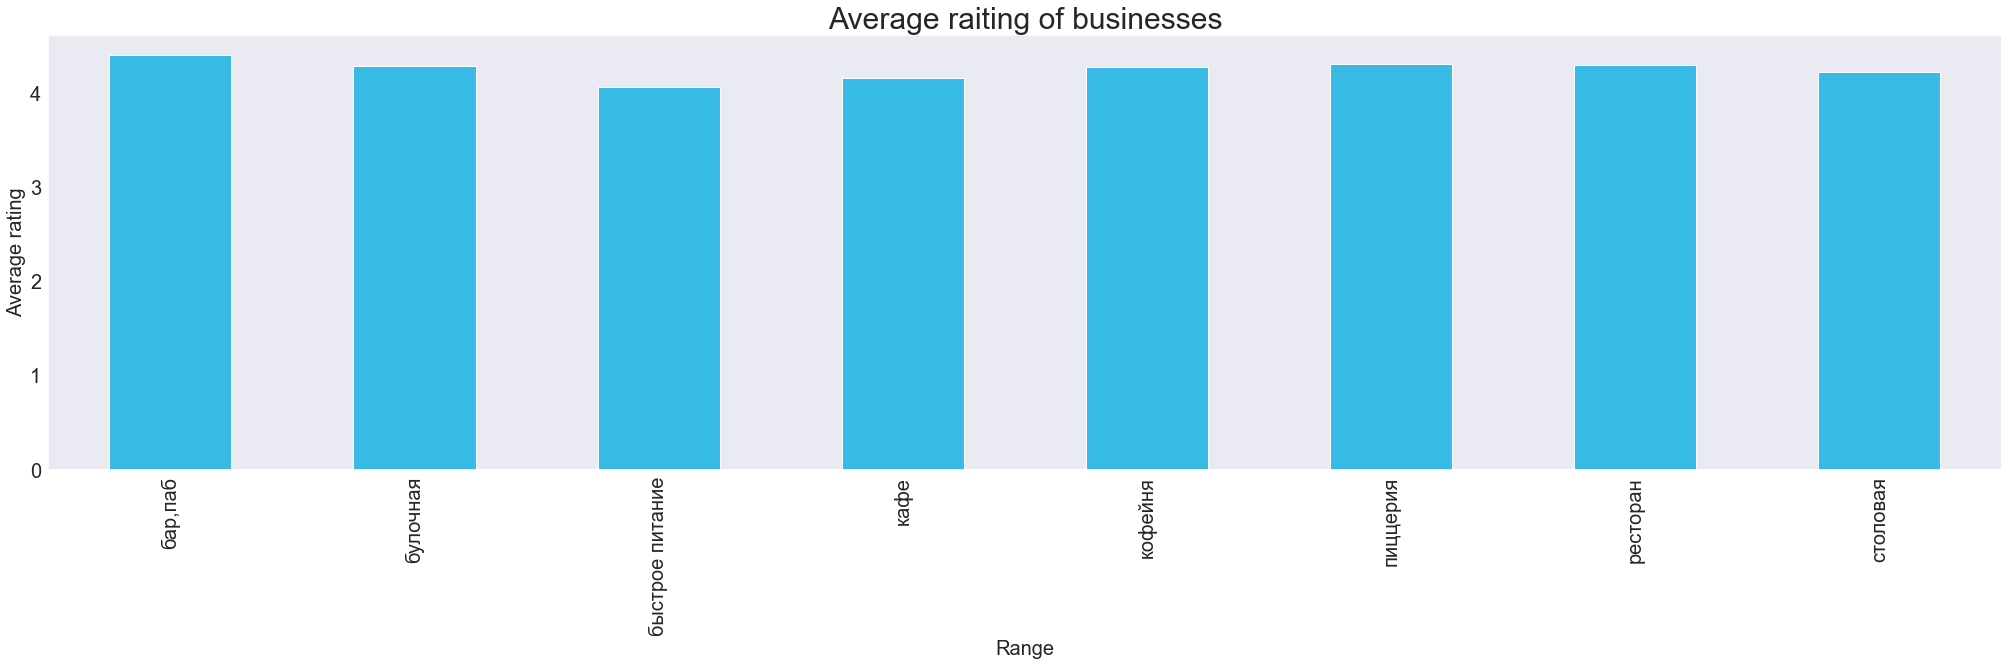

In [131]:
#Lets build a plot
fig = category_rating.plot(kind = 'bar',x='category', y='mean', figsize=(35,8), legend = False, fontsize = 20, color = '#37bbe4')
fig.set_ylabel('Average rating',fontsize = 20)
fig.set_xlabel('Range',fontsize = 20)
fig.set_title('Average raiting of businesses', fontsize = 30);


We see that the average rating is about the same, the leaders are bars and pubs! and in otsuiderah fast food.

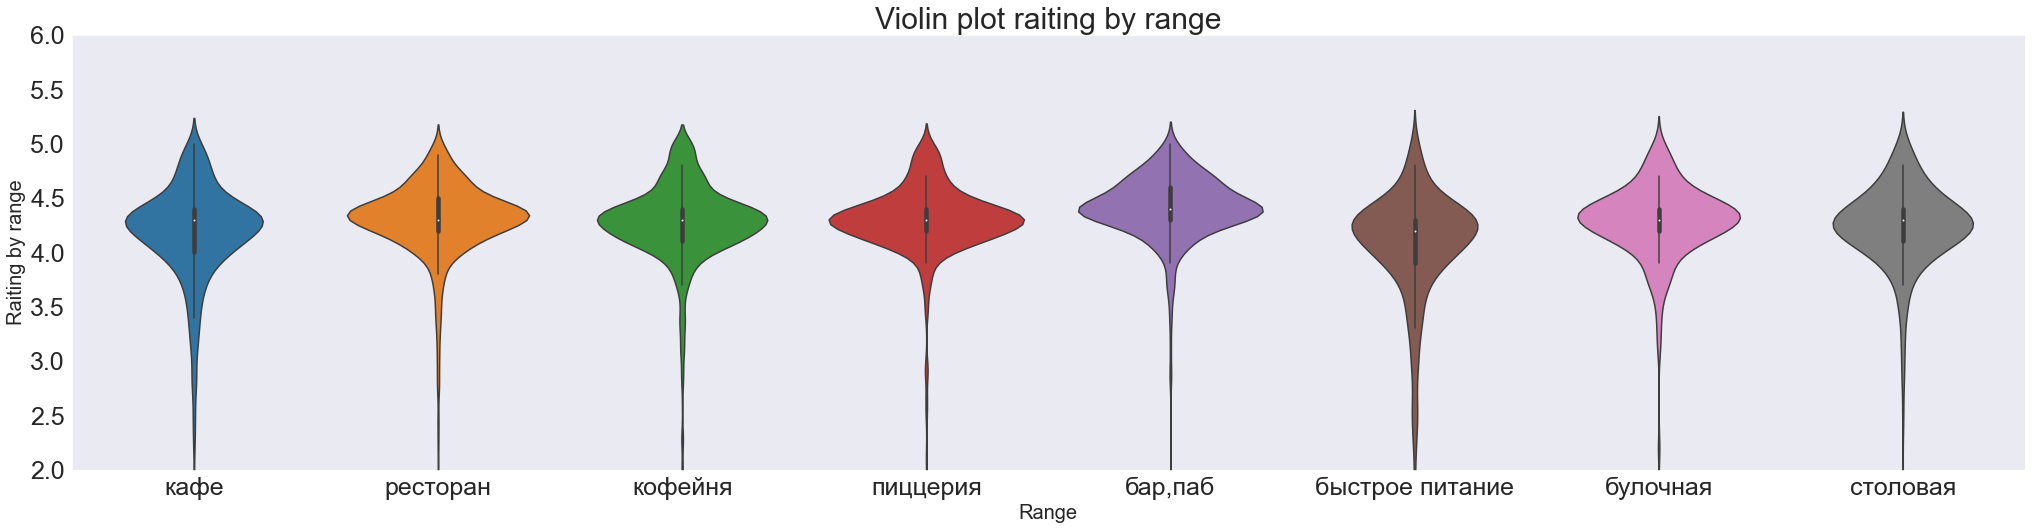

In [132]:
# plot violin by category rating
plt.figure(figsize=(35, 8))
fig = sns.violinplot(x='category', y='rating', data=data, fontsize = 40)
fig.tick_params(axis='both', which='major', labelsize=25)
fig.set_ylabel('Raiting by range',fontsize = 20)
fig.set_xlabel('Range',fontsize = 20)
fig.set_title('Violin plot raiting by range', fontsize = 30)
plt.ylim(2,6);

We see an approximate uniformity of ratings, however, there are many low ratings among cafes and fast foods

In [133]:
#Lets check the distribution of the rating by districts on the map:
district_mean = data.groupby('district').agg({'rating':'mean'}).reset_index()


In [134]:
with open('/datasets/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)


FileNotFoundError: [Errno 2] No such file or directory: '/datasets/admin_level_geomap.geojson'

In [135]:

state_geo = '/datasets/admin_level_geomap.geojson'
moscow_lat, moscow_lng = 55.751244, 37.618423
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)


Choropleth(
    geo_data=state_geo,
    data=district_mean,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    legend_name='Median Rating by District',
).add_to(m)

folium.LayerControl().add_to(m)
m


FileNotFoundError: [Errno 2] No such file or directory: '/datasets/admin_level_geomap.geojson'

As we can see from the map, the businesses with the highest rating are located in the city center, in the second place are the SAO and SZAO, they also have a high average rating, but the quality of the businesses is the worst according to the user. there are ratings in the SEAD and SVAO

In [136]:
#Find the top 15 streets by the amount of businesses
top_rest = data.groupby('street')['name'].count().reset_index().sort_values(by='name',ascending=False)\
.head(15)
top_rest.style.background_gradient('coolwarm')

,street,name
1063,проспект Мира,175
753,Профсоюзная улица,115
509,Ленинский проспект,99
1060,проспект Вернадского,93
358,Дмитровское шоссе,85
440,Каширское шоссе,70
288,Варшавское шоссе,68
508,Ленинградское шоссе,66
507,Ленинградский проспект,66
530,Люблинская улица,56


The largest count of businesses is represented on Mira Avenue and Profsoyuznaya Street. Also, a large count of businesses are located on the longest streets of Moscow:
Leninsky Prospekt-99
Vernadsky Avenue-93
Dmitrovskoe highway-85. closes Pyatnitskaya street and Altufevskoe highway - 44

In [137]:
#Lets find top 15 streets by range
street_category =data.pivot_table(index='street', columns='category', values='name', aggfunc='count').reset_index()
top_rest = top_rest.merge(street_category, on='street', how='left')

In [138]:
top_rest.sort_values(by= 'name', ascending = False).head(15).style.background_gradient('coolwarm')

,street,name,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
0,проспект Мира,175,11.000000,4.000000,21.000000,48.000000,35.000000,11.000000,43.000000,2.000000
1,Профсоюзная улица,115,6.000000,4.000000,15.000000,29.000000,18.000000,15.000000,25.000000,3.000000
2,Ленинский проспект,99,10.000000,3.000000,2.000000,20.000000,23.000000,5.000000,31.000000,5.000000
3,проспект Вернадского,93,5.000000,1.000000,12.000000,20.000000,14.000000,11.000000,28.000000,2.000000
4,Дмитровское шоссе,85,5.000000,2.000000,10.000000,21.000000,11.000000,8.000000,24.000000,4.000000
5,Каширское шоссе,70,1.000000,nan,10.000000,15.000000,16.000000,5.000000,18.000000,5.000000
6,Варшавское шоссе,68,6.000000,nan,7.000000,12.000000,13.000000,4.000000,20.000000,6.000000
7,Ленинградское шоссе,66,4.000000,2.000000,5.000000,12.000000,13.000000,3.000000,24.000000,3.000000
8,Ленинградский проспект,66,13.000000,2.000000,2.000000,7.000000,18.000000,5.000000,18.000000,1.000000
9,Люблинская улица,56,4.000000,nan,5.000000,23.000000,11.000000,1.000000,10.000000,2.000000


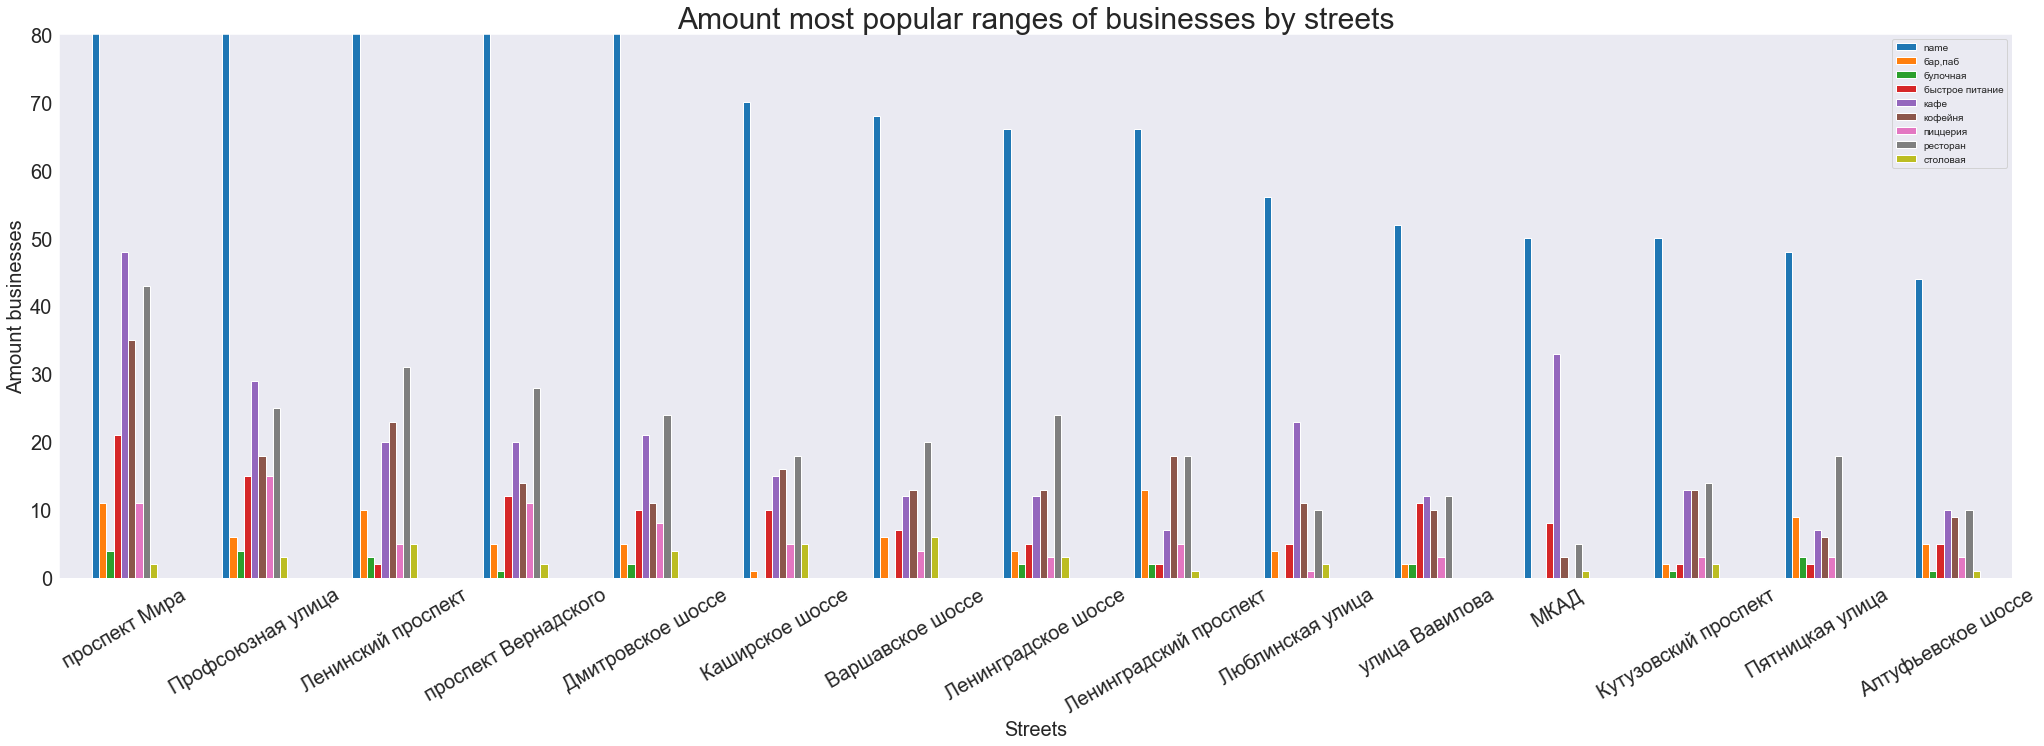

In [139]:
#Lets build plot
fig=top_rest.sort_values(by='name',ascending=False).head(15)\
.plot(x='street', figsize=(35,10), rot=30,
kind='bar',
fontsize = 20, ylim =(0,80))
    
fig.set_title('Amount most popular ranges of businesses by streets', fontsize = 30)
fig.set_ylabel('Amount businesses',fontsize = 20)
fig.set_xlabel('Streets',fontsize = 20);


Prospekt Mira is a leader in terms of the count of businesses. also in ranges for cafes, fast foods, coffee shops and restaurants. In Leningradka, pubs and bars are in the lead, perhaps this is how it happened historically :) Canteens are in the lead in 'Varshavka'.

In [140]:
#Let's find streets with one place
one_place_street = data.groupby('street')['name'].agg(['count','first']).reset_index().sort_values(by='count')

In [141]:
one_place_street.columns = ['street','count','name']

In [142]:
one_place_street = one_place_street[one_place_street['count']==1]
one_place_street

,street,count,name
0,1-й Автозаводский проезд,1,чайхана азия
914,Тюменский проезд,1,смакбери
915,Угличская улица,1,coffeekaldi's
916,Угрешская улица,1,кафе в нии
922,Уссурийская улица,1,шаверма
...,...,...,...
1200,улица Кашёнкин Луг,1,eat&play
1210,улица Константина Федина,1,алло! пицца
1218,улица Костякова,1,1 этаж
169,Анненский проезд,1,столовая в марьиной роще


In [143]:
#Let's make a table for these businesses
data = data.merge(one_place_street, on=['street','name'],how= 'left').copy()

In [144]:
data[data['count']==1].groupby('category')['name'].count().sort_values(ascending=False)

category
кафе               150
ресторан            94
кофейня             91
бар,паб             40
столовая            39
быстрое питание     28
пиццерия            15
булочная            10
Name: name, dtype: int64

In [145]:
#Lets make a table for average bills by category of these businesses
data[(data['count']==1)&(data['middle_avg_bill']!=555)].groupby('category').agg({'name':'count', 'middle_avg_bill':['mean','median'] })


name middle_avg_bill        
                count            mean  median
category                                     
бар,паб            17     1279.411765  1250.0
быстрое питание    10      657.500000   450.0
кафе               50      640.640000   500.0
кофейня            16      587.500000   487.5
пиццерия           11      732.272727   600.0
ресторан           41     1395.121951  1250.0
столовая           25      279.800000   270.0

In [146]:
#group by districts
one_place_dist = data[data['count']==1].groupby('district')['name'].count()
one_place_dist

district
Восточный административный округ            59
Западный административный округ             39
Северный административный округ             60
Северо-Восточный административный округ     56
Северо-Западный административный округ      19
Центральный административный округ         140
Юго-Восточный административный округ        37
Юго-Западный административный округ         17
Южный административный округ                40
Name: name, dtype: int64

In [147]:
one_place_cat = data[data['count']==1].pivot_table(index='district', columns='category', values='name',aggfunc='count').reset_index()
one_place_cat.style.background_gradient('coolwarm')

category,district,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
0,Восточный административный округ,2.000000,nan,7.000000,22.000000,9.000000,6.000000,7.000000,6.000000
1,Западный административный округ,4.000000,2.000000,3.000000,14.000000,3.000000,2.000000,10.000000,1.000000
2,Северный административный округ,2.000000,3.000000,1.000000,22.000000,16.000000,1.000000,8.000000,7.000000
3,Северо-Восточный административный округ,2.000000,nan,5.000000,14.000000,10.000000,2.000000,15.000000,8.000000
4,Северо-Западный административный округ,1.000000,nan,1.000000,4.000000,3.000000,nan,8.000000,2.000000
5,Центральный административный округ,23.000000,2.000000,4.000000,35.000000,34.000000,2.000000,33.000000,7.000000
6,Юго-Восточный административный округ,5.000000,1.000000,2.000000,14.000000,7.000000,1.000000,5.000000,2.000000
7,Юго-Западный административный округ,1.000000,1.000000,3.000000,6.000000,4.000000,nan,1.000000,1.000000
8,Южный административный округ,nan,1.000000,2.000000,19.000000,5.000000,1.000000,7.000000,5.000000


In [148]:
#lets merge datasets and sort by amount of businesses
one_place_dist = one_place_cat.merge(one_place_dist, on= 'district', how='left')
one_place_dist = one_place_dist.rename(columns={'name':'total'})
one_place_dist.sort_values(by='total', ascending=False).style.background_gradient('coolwarm')

,district,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая,total
5,Центральный административный округ,23.000000,2.000000,4.000000,35.000000,34.000000,2.000000,33.000000,7.000000,140
2,Северный административный округ,2.000000,3.000000,1.000000,22.000000,16.000000,1.000000,8.000000,7.000000,60
0,Восточный административный округ,2.000000,nan,7.000000,22.000000,9.000000,6.000000,7.000000,6.000000,59
3,Северо-Восточный административный округ,2.000000,nan,5.000000,14.000000,10.000000,2.000000,15.000000,8.000000,56
8,Южный административный округ,nan,1.000000,2.000000,19.000000,5.000000,1.000000,7.000000,5.000000,40
1,Западный административный округ,4.000000,2.000000,3.000000,14.000000,3.000000,2.000000,10.000000,1.000000,39
6,Юго-Восточный административный округ,5.000000,1.000000,2.000000,14.000000,7.000000,1.000000,5.000000,2.000000,37
4,Северо-Западный административный округ,1.000000,nan,1.000000,4.000000,3.000000,nan,8.000000,2.000000,19
7,Юго-Западный административный округ,1.000000,1.000000,3.000000,6.000000,4.000000,nan,1.000000,1.000000,17


We see that there is no significant difference in the average check. As with the study as a whole, the CAO has the most businesses, probably because there are more streets and in the center, such businesses are always more in demand by tourists or workers who are concentrated there. We also see a significant share of canteens in the center. in terms of bars, cafes and restaurants, the center is a significant leader. outsiders are also SZAO and SZAO.

In [149]:
#Lets calculate the median of the average check by county
district_mean_bill = data[data['middle_avg_bill']!=555].groupby('district').agg({'middle_avg_bill':'median'}).reset_index()

In [150]:
#change district names
district_mean_bill['district'] = ['ВАО', 'ЗАО', 'САО', 'СВАО', 'СЗАО', 'ЦАО', 'ЮВАО', 'ЮЗАО', 'ЮАО']

In [151]:
#lets build plot
state_geo = '/datasets/admin_level_geomap.geojson'
moscow_lat, moscow_lng = 55.751244, 37.618423
m2 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
Choropleth(
    geo_data=state_geo,
    data=district_mean_bill,
    columns=['district', 'middle_avg_bill'],
    key_on='properties.ref',
    fill_color='PuRd',
    fill_opacity=0.8,
    legend_name='Median Average Bill by District',
).add_to(m2)
m2


FileNotFoundError: [Errno 2] No such file or directory: '/datasets/admin_level_geomap.geojson'

We see the highest average check in the Central Administrative District and CJSC and a lower average check in the Northeast Administrative District

## 4. Detailed reserching: opening a coffee house. <a id="detail"></a>

In [152]:
#let's check how many coffee houses by district
district_coffee =data[data['category'] == 'кофейня'].pivot_table(index='district', columns='category', values='name', aggfunc='count').reset_index()
district_coffee.sort_values(by='кофейня', ascending = False).style.background_gradient('coolwarm')


category,district,кофейня
5,Центральный административный округ,424
2,Северный административный округ,182
3,Северо-Восточный административный округ,157
1,Западный административный округ,144
8,Южный административный округ,130
0,Восточный административный округ,100
7,Юго-Западный административный округ,94
6,Юго-Восточный административный округ,87
4,Северо-Западный административный округ,62


In [153]:
#let's check how many round-the-clock coffee houses
nonstop_coffee = data[(data['category'] == 'кофейня')&(data['is_24/7'] == True)]['is_24/7'].sum()
nonstop_coffee

59

In [155]:
#let's check how many round-the-clock coffee shops as a percentage
non_stop_coffee = round(nonstop_coffee/data[data['category'] == 'кофейня']['category'].count()*100,1)
non_stop_coffee

4.3

In [156]:
#look at the median and average cost of a cup of coffee in a coffee shop
coffee_cup =data[(data['middle_coffee_cup']!=-555) & (data['category'] == 'кофейня')]\
.pivot_table(index='category', values='middle_coffee_cup', aggfunc=['mean','median'])\
.reset_index()
coffee_cup

,category,mean,median
,,middle_coffee_cup,middle_coffee_cup
0,кофейня,170.555118,165.0


In [157]:
district_coffee = data[data['category'] == 'кофейня'].pivot_table(index='district', values='rating', aggfunc='mean').reset_index()
district_coffee.style.background_gradient('coolwarm')

,district,rating
0,Восточный административный округ,4.279000
1,Западный административный округ,4.189583
2,Северный административный округ,4.294505
3,Северо-Восточный административный округ,4.214013
4,Северо-Западный административный округ,4.325806
5,Центральный административный округ,4.336321
6,Юго-Восточный административный округ,4.216092
7,Юго-Западный административный округ,4.274468
8,Южный административный округ,4.232308


In [158]:
#Lets build a plot
state_geo = '/datasets/admin_level_geomap.geojson'
moscow_lat, moscow_lng = 55.751244, 37.618423
m3 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)


Choropleth(
    geo_data=state_geo,
    data=district_coffee,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    legend_name='Coffee Rating by District',
).add_to(m3)


m3

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/admin_level_geomap.geojson'

So, there are 1380 coffee houses in the dataset. Most of them are located in the central administrative district, in second place is the SAO in the third SVAO. the fewest cafes in SZAO (62)
the average check is 615 rubles, the median value is 400 rubles. According to the rating of coffee houses, the minimum rating is 1.4. The maximum rating is 5, while the average and median are about the same at 4.3. coffee houses with the highest rating are located in the CAO, SZAO and SAO, and with the lowest rating in ZAO. At least in some ways SZAO was in the lead :)
As for the cost of a cup of coffee, the data on the average and median values ​​are approximately the same, we will assume that the average cost of 170 rubles is fair.

## 5. Presentation.

Презентация : https://disk.yandex.ru/i/6cV3G3HYfIwP3Q

## 6. General conclusion <a id="end"></a>

During the research we:

* reviewed the data
* built graphs on the dataset to see the distribution of data,
* cleared data from Nans,
* checked the data for duplicates,
* got rid of outliers in the data,
* added new columns needed for research,
* changed the data type where necessary.
* Then we found the amount of enterprises by ranges specified in the dataset,
* calculated the average and median average bills by ranges of businesses.
* We determined the amount of seats by range of businesses.
* We determined the ratio of chain and non-chain ranges of businesses,
* found the top 15 businesses by amount in Moscow.
* We calculated the distribution of the amount of businesses by districts of Moscow,
* ranges were determined by the districts of Moscow.
* Ratings were calculated by ganres of businesses (minimum, maximum and median).
* We found the top 15 streets by the amount of businesses and by range.
* We calculated the median average bill by county. And also directly to answer the tasks,
* calculated the average and median price of a cup of coffee in cafes,

answering the question posed about opening a coffee hous: Based on the research done, I think that opening a coffee hous is quite advisable given them:

* popularity,
* high ratings from visitors
* a relatively high average bill, given that coffee houses do not have high costs for maintaining a kitchen, a wide range of menus and a large number of staff
* The amount of seats is comparable to other ranges of businesses.

I recommend take into consideration a CAO or CJSC for opening a coffee shop. We see the highest average bills in these two districts. But in contrast to the CAO, in the CAO there are coffee houses with low visitor reviews, so you can win on competitive advantages. We also see that in ZAO the amount of coffee houses is low compared to other districts. It can also be taken into account that in ZAO there are practically no serious large-scale industries, these are mainly residential areas with a large number of residents. Also, ZAO is considered one of the prestigious areas where people with high incomes live.